# Assignment Ch. 5 - Computer Vision [Case #1]
Startup Campus, Indonesia - `Artificial Intelligence Track`
* Dataset: -
* Libraries: Scikit-image, OpenCV, Numpy, Matplotlib
* Objective: Digital Image Processing

`PREREQUISITE` All modules (with their suitable versions) are installed properly.
<br>`TASK` Complete the notebook cell's code marked with <b>#TODO</b> comment.
<br>`TARGET PORTFOLIO` Students are able to replicate the image enhancement algorithm commonly (and recently) used in smartphone companies.
<br>`WARNING` Do **NOT CHANGE** any codes within the User-defined Functions (UDFs) section.

### Case Study Description
As of July 2023, both Apple and Samsung lead the smartphone industry worldwide, with a combined 52.61% of the total market share [(ref1)](https://www.oberlo.com/statistics/smartphone-market-share). As the main feature that must be present on today's smartphones, Apple and Samsung are competing to create camera technology so you can capture your best photo even in the low light condition.
- In September 2019, Apple introduced **Deep Fusion** technology (via the iPhone 11 series) to tackle the challenge. Its upgrade, named **Photonic Engine**, was introduced in September 2022 via the new iPhone 14 series [(ref2)](https://www.youtube.com/watch?v=ux6zXguiqxM&t=4784s&ab_channel=Apple).
- In February 2023, Samsung introduced **Adaptive Tetra-squared Pixel Sensor** technology with the Samsung S23 series as a counter-solution to a similar problem, promising excellent bright photo results from dark-toned images [(ref3)](https://www.youtube.com/watch?v=gUM2wYKdxDA&t=742s&ab_channel=Samsung).

At its core, both technologies work by combining several adjacent pixels into a single pixel, using a **Max Pooling** operation. In this case, you are challenged to replicate the concept (brighten dark-toned photos), and then compare the result with another approach, i.e., **Contrast Limited Adaptive Histogram Equation (CLAHE)**.

[KLIK UNTUK TERJEMAHKAN TEKS](https://translate.google.com/?hl=id&ie=UTF-8&sl=en&tl=id&text=As%20of%20July%202023%2C%20both%20Apple%20and%20Samsung%20lead%20the%20smartphone%20industry%20worldwide%2C%20with%20a%20combined%2052.61%25%20of%20the%20total%20market%20share%20(ref1).%20As%20the%20main%20feature%20that%20must%20be%20present%20on%20today%27s%20smartphones%2C%20Apple%20and%20Samsung%20are%20competing%20to%20create%20camera%20technology%20so%20you%20can%20capture%20your%20best%20photo%20even%20in%20the%20low%20light%20condition.%0A%0A-%20In%20September%202019%2C%20Apple%20introduced%20Deep%20Fusion%20technology%20(via%20the%20iPhone%2011%20series)%20to%20tackle%20the%20challenge.%20Its%20upgrade%2C%20named%20Photonic%20Engine%2C%20was%20introduced%20in%20September%202022%20via%20the%20new%20iPhone%2014%20series%20(ref2).%0A%0A-%20In%20February%202023%2C%20Samsung%20introduced%20Adaptive%20Tetra-squared%20Pixel%20Sensor%20technology%20with%20the%20Samsung%20S23%20series%20as%20a%20counter-solution%20to%20a%20similar%20problem%2C%20promising%20excellent%20bright%20photo%20results%20from%20dark-toned%20images%20(ref3).%0A%0AAt%20its%20core%2C%20both%20technologies%20work%20by%20combining%20several%20adjacent%20pixels%20into%20a%20single%20pixel%2C%20using%20a%20Max%20Pooling%20operation.%20In%20this%20case%2C%20you%20are%20challenged%20to%20replicate%20the%20concept%20(brighten%20dark-toned%20photos)%2C%20and%20then%20compare%20the%20result%20with%20another%20approach%2C%20i.e.%2C%20Contrast%20Limited%20Adaptive%20Histogram%20Equation%20(CLAHE).&op=translate)

### Import libraries

In [18]:
import numpy as np, cv2
from skimage.io import imsave
from skimage.measure import block_reduce
from torch.nn import MaxPool2d
from torch import from_numpy
from matplotlib import pyplot as plt
from matplotlib.image import imread

### User-defined Functions (UDFs)

In [20]:
def plot(
    imgs : list,
    titles : list = ["ORIGINAL", "EDITED"],
    figsize : tuple = (8, 5),
    cmaps : list = [None, None],
    *args, **kwargs
) -> None:

    if len(imgs) > 3:
        raise ValueError("Max. total image = 3.")

    if len(imgs) != len(titles):
        raise ValueError("'imgs' should be in the same length with 'titles'.")

    my_figure = plt.figure(figsize=figsize)
    # NOTE: figsize=(width/horizontally, height/vertically)

    fig_ids = [121, 122] if len(imgs) == 2 else [131, 132, 133]

    for idx, img, title, c in zip(fig_ids, imgs, titles, cmaps):
        m = my_figure.add_subplot(idx)
        plt.imshow(img, cmap=c)
        plt.axis("off")
        plt.title(title)

    plt.tight_layout()

In [21]:
def apply_clahe_rgb(img, clipLimit=2, tileGridSize=(10, 10)):
    # LAB color model where L = Lightness, a = green-red, b = blue-yellow
    light, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB)) # convert to LAB color model
    light_clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize).apply(light) # apply CLAHE for lightness (L) component only
    return cv2.cvtColor(cv2.merge((light_clahe, a, b)), cv2.COLOR_LAB2BGR) # return with reconvert to BGR color model

### Load dataset
Do NOT forget to upload "photo1.jpeg" and "lena.png" to the Google Collab files.

In [22]:
img = cv2.imread("photo1.jpeg")

In [23]:
lena = cv2.imread("lena.png")

### Warm Up: Image processing (exploration using OpenCV)

* Color image -> Grayscale image

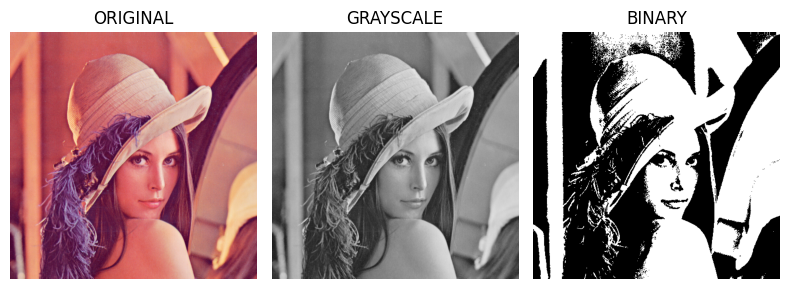

In [26]:
# original image

img_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # TODO: Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB

# color image to grayscaled image
img_grayscaled = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # TODO: Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
img_grayscaled = cv2.cvtColor(img_grayscaled, cv2.COLOR_GRAY2RGB)

# grayscaled image to binary image
_, img_binary = cv2.threshold(img_grayscaled, 127, 255, cv2.THRESH_BINARY) # TODO: Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY

# plot both
plot(imgs=[img_lena, img_grayscaled, img_binary], titles=["ORIGINAL", "GRAYSCALE", "BINARY"], cmaps=[None, 'gray', "gray"])

* Check their histograms

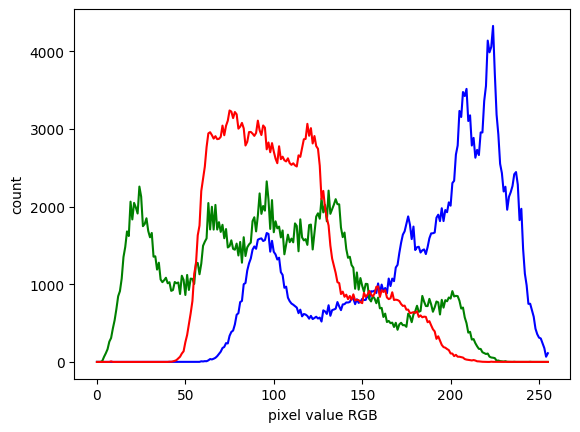

In [27]:
# TODO: Plot the histogram from the original image
color = ('b', 'g', 'r')
for i, col in enumerate(color):
  histr = cv2.calcHist(images=[img_lena], channels=[i], mask=None, histSize=[256], ranges=[0, 256])
  plt.plot(histr, color=col)

plt.xlabel("pixel value RGB")
plt.ylabel("count")
plt.show()

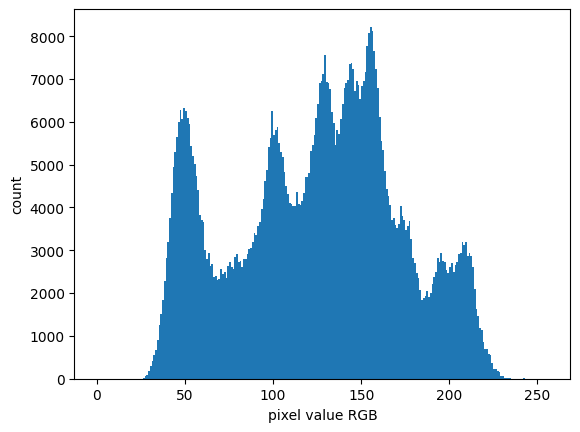

In [28]:
# TODO: Plot the histogram from the grayscaled image
plt.hist(img_grayscaled.ravel(), bins=256, range=[0, 256])
plt.xlabel("pixel value RGB")
plt.ylabel("count")
plt.show()

### Max Pooling (using Scikit-image)

In [29]:
BLOCK_SIZE = (4, 4, 1)

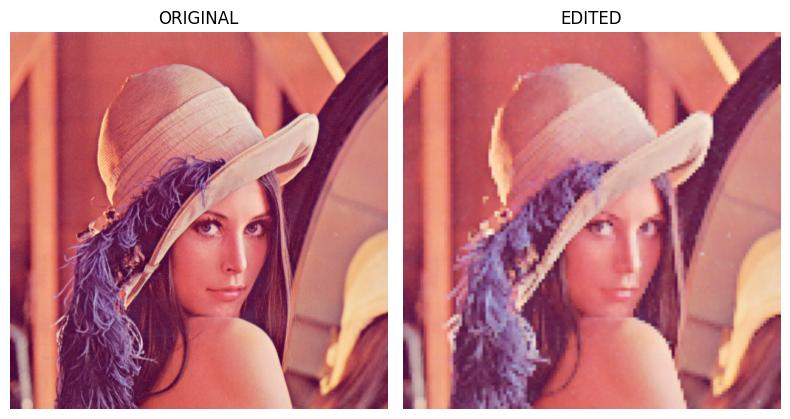

In [30]:
img_edited = block_reduce(img_lena, block_size=BLOCK_SIZE, func=np.max)
plot(imgs=[img_lena, img_edited])

### Max Pooling (using PyTorch)

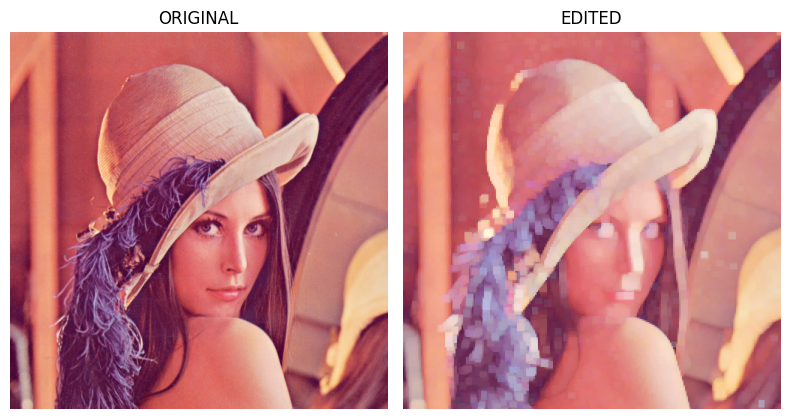

In [31]:
# convert numpy-based image to torch.Tensor type
img_torch = from_numpy(img_lena).permute(2, 0, 1).float()

# prepare Max Pooling operation from PyTorch
max_pooling = MaxPool2d(kernel_size=9, stride=2)

# perform Max Pooling operation
img_torch_edited = max_pooling(img_torch).permute(1, 2, 0).int().numpy()
plot(imgs=[img_lena, img_torch_edited])

In [ ]:
# QUESTIONS
# TODO: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?


[ ANSWER HERE ]
Menurut saya pada Pytorch sendiri menyediakan cara yang lebih efisien dan lebih untuk melakukan operasi Max Pooling khususnya dalam penggunaan pada jaringan syarat tiruan sehingga ketika bekerja dengan menggunakan PyTorch dapat melakukan Max Pooling dengan lebih cepat dan efisien terutama jika menggunakan GPU. Sedangkan pada Scikit-image ini lebih cocok digunakan untuk pengolahan gambar tradisional di CPU tanpa berfokus pada jaringn syaraf tiruan. Jadi dalam PyTorch atau Scikit-image ini digunakan tergantung pada tugas apa yang ingin dilakukan dalam mengolah gambar.

### Min Pooling and Average Pooling

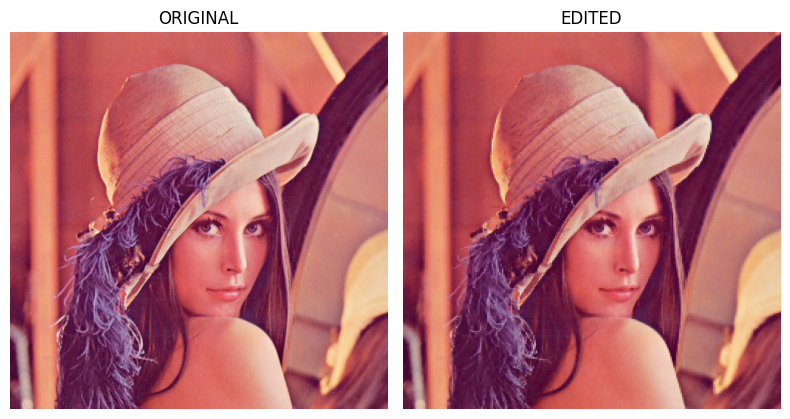

In [32]:
block_size = 2
img_edited_min = block_reduce(img_lena, block_size=(block_size, block_size, 1), func=np.min) # TODO: Recall the block_reduce(), but with func=np.min
plot(imgs=[img_lena, img_edited_min])

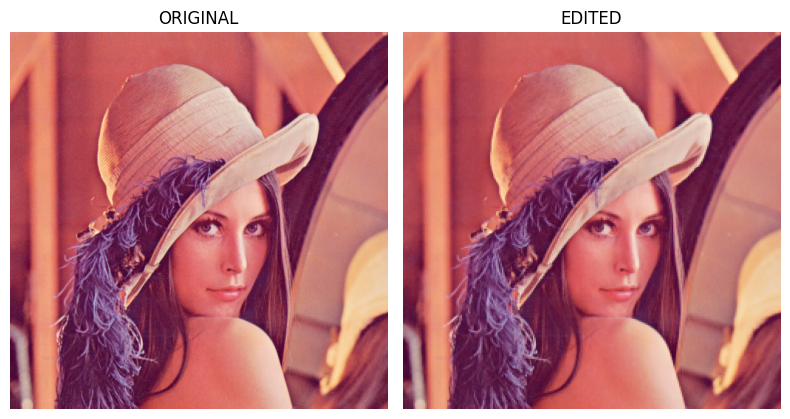

In [ ]:
img_edited_avg = block_reduce(img_lena, block_size=(block_size, block_size, 1), func=np.mean).astype(int) # TODO: Recall the block_reduce().astype(int), but with func=np.mean
plot(imgs=[img_lena, img_edited_avg])

In [ ]:
# QUESTIONS
# TODO: What is the difference between Min Pooling and Average Pooling operations?
# If you cannot see the difference, try with another image or change the BLOCK_SIZE.

[ ANSWER HERE ]
Min Pooling dan Average Pooling memiliki beberapa perbedaan dengan dua cara yang berbeda dalam menggabungkan informasi dari beberapa piksel pada gambar. Min Pooling sendiri akan mengambil nilai terkecil dari sekelompok piksel, sementara Average Pooliing akan mengambil rata-rata dari nilai-nilai tersebut.

Jadi jika melihat gambar diatas kita akan memiliki daerah dimana di gambar ada yang sangat terang dan dan daerah yang lain sangat gelap. Sedangkan pada min-pooling sendiri cenderung untuk mempertahankan perbedaan warna yang tajam sehingga dapat dilihat digambar warna yang dihasilkan akan lebih gelap sedangkan average pooling ini mencoba untuk membuat daerah-daerah menjadi lebih lembut dan warna yang dihasilkan lebih terang.


### CLAHE
Now imagine you have a better approach to compete Apple's Photonic Engine and Samsung's Adaptive Tetra-squared Pixel technologies using **Contrast Limited Adaptive Histogram Equalization (CLAHE)**. How's the result?

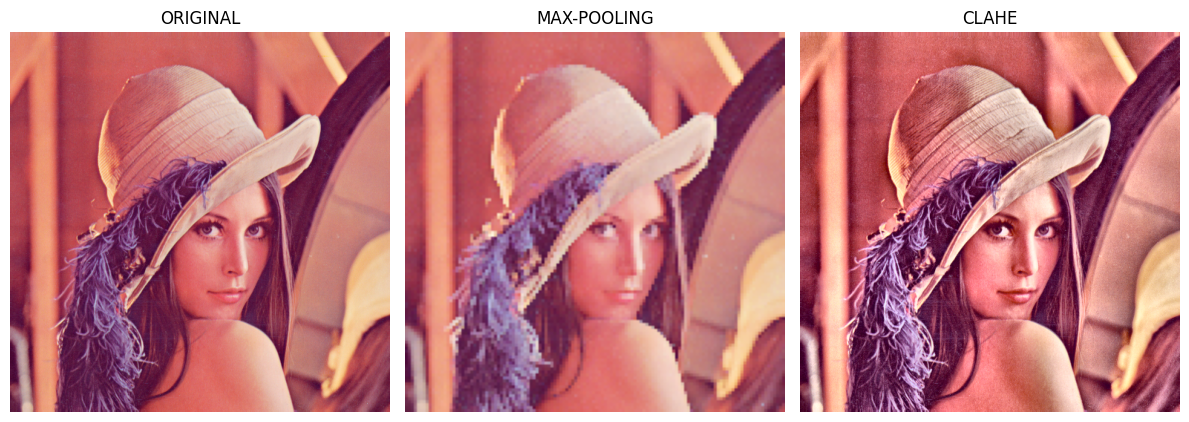

In [33]:
img_clahe = apply_clahe_rgb(img_lena) # TODO: Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
plot(imgs=[img_lena, img_edited, img_clahe], titles=["ORIGINAL", "MAX-POOLING", "CLAHE"], figsize=(12, 5), cmaps=[None]*3)

In [ ]:
# QUESTIONS
# TODO: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?

[ ANSWER HERE ]
Keuntungan CLAHE dibandingkan dengan Max Pooling adalah CLAHE lebih baik ketika ingin mencerahkan bagian gamar yang gelap atau redup. Sedangkan Max Pooling cenderung menghilangkan rincian halus dan tekstur dari gambar, untuk CLAHE sendiri ini adlah cara untuk memperbaiki kontras di area yang gelap tanpa kehilangan rincian bagian penting. Jadi CLAHE ini menghasilkan gambar yang terlihat lebih jelas dan detail dibandingkan dengan menggunakan Max Pooling yang menghasilkan gambar yang halus dan lebih lembut.

### Save your edited image

In [34]:
FILE_NAME = "clahe_enhanced.png" # TODO: Give any file name to your new CLAHE-enhanced photo, ends with .png extension
imsave(fname=FILE_NAME, arr=img_clahe)

### Scoring
Total `#TODO` = 12
<br>Checklist:

- [v] Change the color channel from BGR to RGB using cv2.COLOR_BGR2RGB
- [v] Change the color channel from BGR to Grayscale using cv2.COLOR_BGR2GRAY
- [v] Change the color channel from Grayscale to Binary using cv2.THRESH_BINARY
- [v] Plot the histogram from the original image
- [v] Plot the histogram from the grayscaled image
- [v] QUESTION: What does PyTorch offer in its Max Pooling operation compared to Scikit-image?
- [v] Recall the block_reduce(), but with func=np.min
- [v] Recall the block_reduce().astype(int), but with func=np.mean
- [v] What is the difference between Min Pooling and Average Pooling operations?
- [v] Call the function apply_clahe_rgb() and pass the variable image of "photo1.jpeg"
- [v] QUESTION: What are the advantages of using CLAHE (instead of Max Pooling) to brighten the dark-toned image?
- [v] Give any file name to your new CLAHE-enhanced photo, ends with .png extension

### Additional readings
* https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

### Copyright © 2023 Startup Campus, Indonesia
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.